# Twitter API

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import json
import glob
import os

## Helper Funtions

In [2]:
# Renvoie une dataframe avec le contenu de tous les fichiers .json du dossier passé en argument
def createDF(path_to_folder, test_set=False):
    
    os.chdir(path_to_folder)

    df_results = pd.DataFrame(columns=['contributors', 'coordinates', 'created_at', 'display_text_range',
           'entities', 'extended_tweet', 'favorite_count', 'favorited',
           'filter_level', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
           'in_reply_to_status_id', 'in_reply_to_status_id_str',
           'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
           'lang', 'matching_rules', 'place', 'possibly_sensitive', 'quote_count',
           'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
           'quoted_status_permalink', 'reply_count', 'retweet_count', 'retweeted',
           'retweeted_status', 'source', 'text', 'truncated', 'user'])
        
    for filename in glob.glob("*.json"):
        data = json.load(open(filename))
        df_current = pd.DataFrame(data["results"])
        df_results = pd.concat([df_results, df_current], sort=False)
    
    if test_set:
        df_results = df_results.sample(10)
    
    return df_results

In [3]:
# Ajoute une colonne date à partir de la colonne created_at
map_month = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8,'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12,}

def extractDate(df):
    # création d'une colonne date avec les premiers caractères de la colonne created_at 
    df['date'] = df.created_at.str[:10]
    
    # division de la colonne date en un tuple new = weekday, month, date
    new = df['date'].str.split(' ', n = 2, expand = True)
    
    # ajout des colonnes day, month, year
    df['day'] = new[2] 
    df['month'] = new[1] 
    df.month = df.month.map(map_month)
    df['year'] = '2020'
    
    # modification de la colonne date pour avoir le format yyyy-mm-dd
    df['date'] = df['year'].str.cat(df[['month', 'day']].astype(str), sep="-")
    df['date'] = df['date'].astype('datetime64')
    
    # suppression des colonnes inutiles
    del df['day']
    del df['month']
    del df['year']

In [4]:
# Fonction d'affichage d'un histogramme pour une dataframe avec une colonne date (stack overflow)
def visualize(df, column_name='date', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby([df[column_name].dt.month,df[column_name].dt.day])
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#ffffff')
    ax.set_xlabel("jour")
    ax.set_ylabel("nombre de tweets")
    ax.set_title(title)
    plt.show()

## Load Data

In [5]:
df_5G = createDF('/Users/benji/Desktop/GI01/IC05/Projet/Essaiv3/5G')
df_5G.shape

(1228, 36)

In [6]:
df_Gates = createDF('/Users/benji/Desktop/GI01/IC05/Projet/Essaiv3/Gates')
df_Gates.shape

(5183, 36)

In [7]:
df_hydro = createDF('/Users/benji/Desktop/GI01/IC05/Projet/Essaiv3/Hydroxychloroquine/')
df_hydro.shape

(14087, 36)

## Building a test dataset

In [64]:
df_test5G = createDF('/Users/benji/Desktop/GI01/IC05/Projet/Essaiv3/Hydroxychloroquine/', test_set=True)

In [228]:
df_copy = df_test5G.copy(deep=True)

In [229]:
df_copy.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_tweet,favorite_count,favorited,filter_level,geo,...,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,truncated,user,extended_entities
18,None,None,Thu Oct 22 21:26:41 +0000 2020,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,0,False,low,None,...,NaN,0,0,False,{'created_at': 'Thu Oct 22 16:49:02 +0000 2020...,"<a href=""http://twitter.com/download/android"" ...",RT @Infirmier0: On apprend que l'Allemagne a m...,False,"{'id': 952849515542872065, 'id_str': '95284951...",NaN
29,None,None,Fri Oct 09 19:20:21 +0000 2020,NaN,"{'hashtags': [{'text': 'Veran', 'indices': [36...",NaN,0,False,low,None,...,NaN,0,0,False,{'created_at': 'Fri Oct 09 16:49:03 +0000 2020...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @OSTERElizabeth1: Notre ministre #Veran si ...,False,"{'id': 1252263087211773952, 'id_str': '1252263...",NaN


In [230]:
extractDate(df_copy)

In [231]:
df_copy['date']

18   2020-10-22
29   2020-10-09
21   2020-10-26
27   2020-10-17
37   2020-10-24
2    2020-10-14
47   2020-11-25
14   2020-11-27
9    2020-10-23
4    2020-11-07
Name: date, dtype: datetime64[ns]

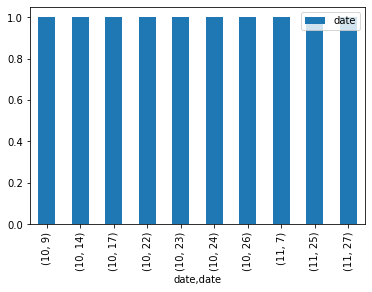

In [187]:
plot_hist(df_copy)

## Testing on real dataset

### Bill Gates Dataframe

In [8]:
extractDate(df_Gates)

# On ne garde que les tweets des derniers mois
df_Gates = df_Gates[(df_Gates['date'] > '2020-10-05') & (df_Gates['date'] < '2020-12-07')]

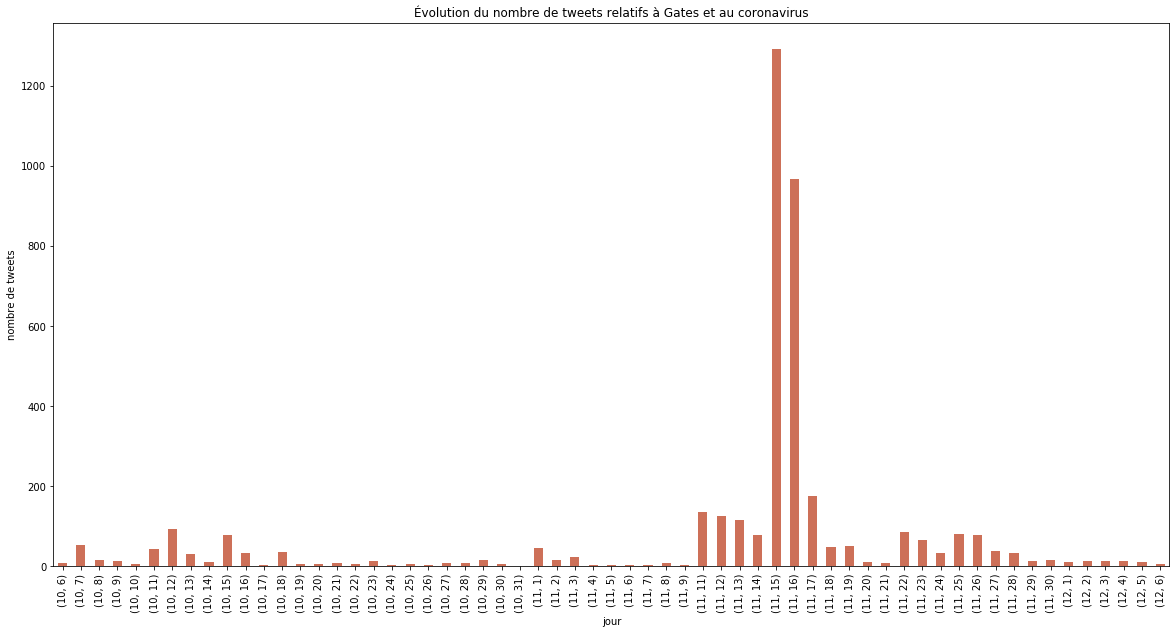

In [9]:
visualize(df_Gates, color='#CD7058', title='Évolution du nombre de tweets relatifs à Gates et au coronavirus')

### 5G Dataframe

In [10]:
extractDate(df_5G)

# On ne garde que les tweets des derniers mois
df_5G = df_5G[(df_5G['date'] > '2020-10-05') & (df_5G['date'] < '2020-12-07')]

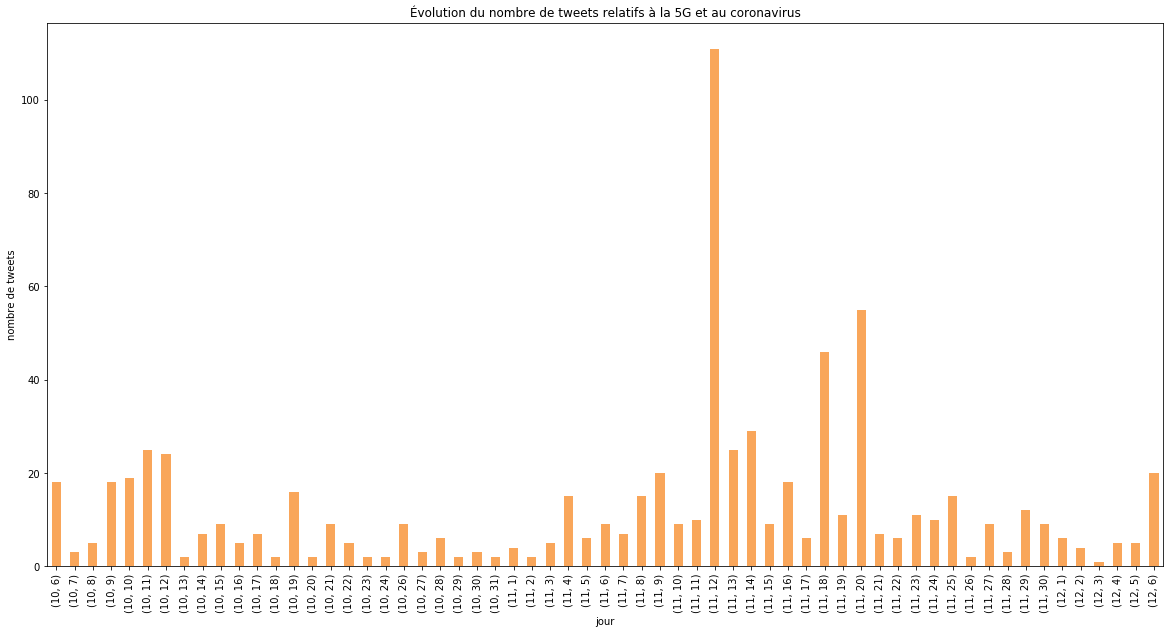

In [11]:
visualize(df_5G, color='#F9A65A', title='Évolution du nombre de tweets relatifs à la 5G et au coronavirus')

### Hydroxycloroquine Dataframe

In [12]:
extractDate(df_hydro)

# On ne garde que les tweets des derniers mois
df_hydro = df_hydro[(df_hydro['date'] > '2020-10-05') & (df_hydro['date'] < '2020-12-07')]

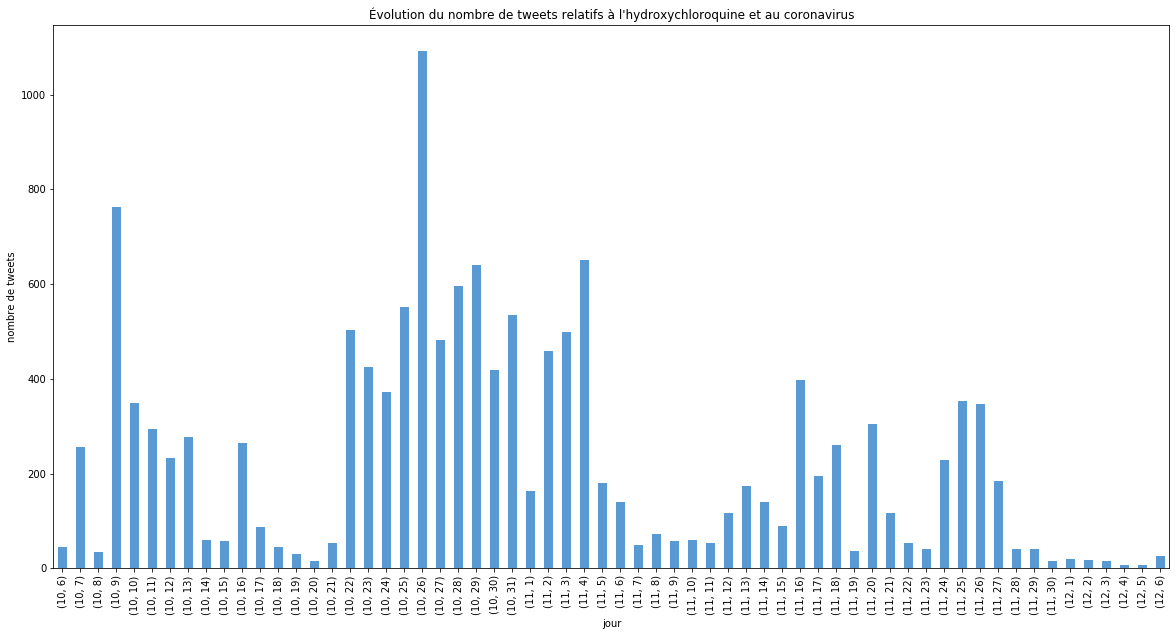

In [13]:
visualize(df_hydro, color='#599AD3', title='Évolution du nombre de tweets relatifs à l\'hydroxychloroquine et au coronavirus')

In [70]:
df_hydro['text'].sample(10)

6     RT @biobiobiobior: 🔴 Pays-Bas: « L’Hydroxychlo...
31    RT @Stalec_: Ils ne savent pas, \nIls se quest...
6     RT @biobiobiobioc: 🔺USA, 24 Novembre: « Une ét...
3     RT @RTenfrancais: Interdiction de l’#hydroxych...
54    "Le principal promoteur de l’hydroxychloroquin...
9     RT @biobiobiobioc: 🔺« Vous n’avez qu’à regarde...
1     RT @biobiobiobior: 🔴 Pays-Bas: « L’Hydroxychlo...
25    RT @biobiobiobior: 🔺France, 07 Octobre: « Vous...
29    RT @biobiobiobior: 🔴🔴 France, 26 Octobre: « Sa...
34    RT @RTenfrancais: #Hydroxychloroquine : «Tous ...
Name: text, dtype: object

### Les 3 théories en même temps

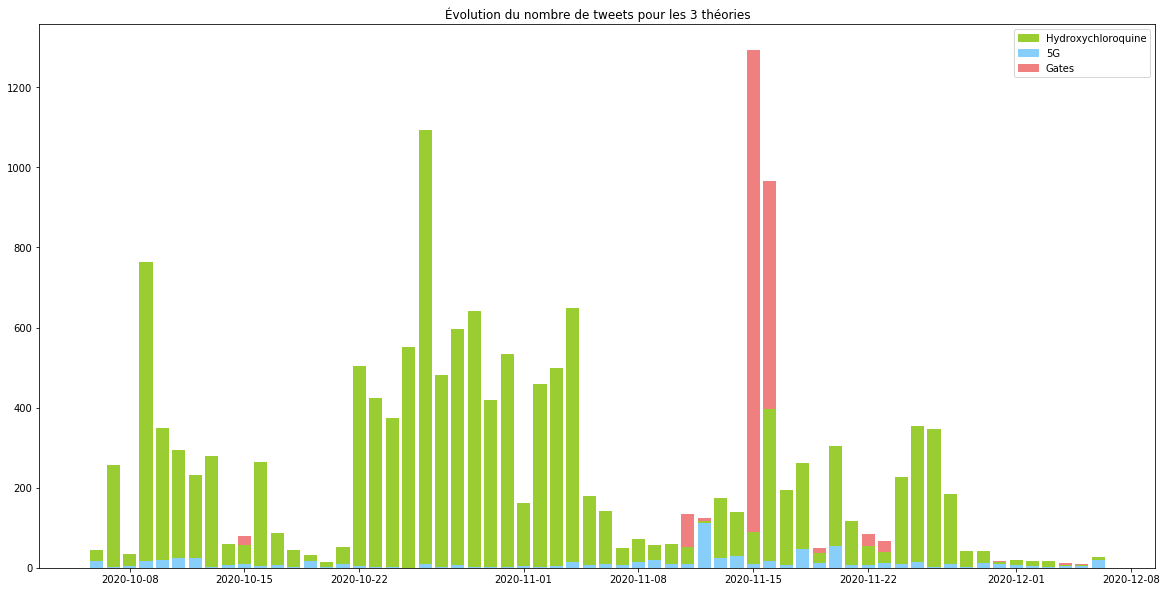

In [52]:
plt.figure(figsize=(20, 10))

# Bill Gates
freq_gates = df_Gates['date'].value_counts()
plt.bar(freq_gates.index, freq_gates.values, color='lightcoral')

# Hydroxychloroquine
freq_hydro = df_hydro['date'].value_counts()
plt.bar(freq_hydro.index, freq_hydro.values, color='yellowgreen')

# 5G
freq_5g = df_5G['date'].value_counts()
plt.bar(freq_5g.index, freq_5g.values, color='lightskyblue')

plt.title('Évolution du nombre de tweets pour les 3 théories')

colors = {'Hydroxychloroquine':'yellowgreen', '5G':'lightskyblue', 'Gates':'lightcoral'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

### Repartition des tweets par théorie